# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [6]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

max_SD = 1457.1476417203799
min_SD = 908.1713254614044


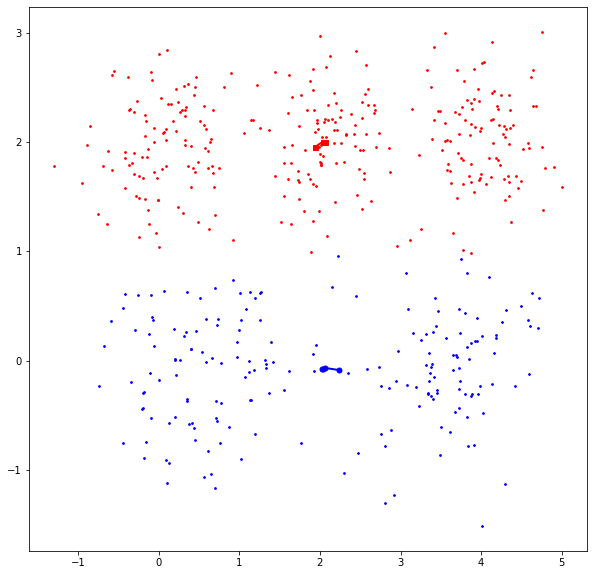

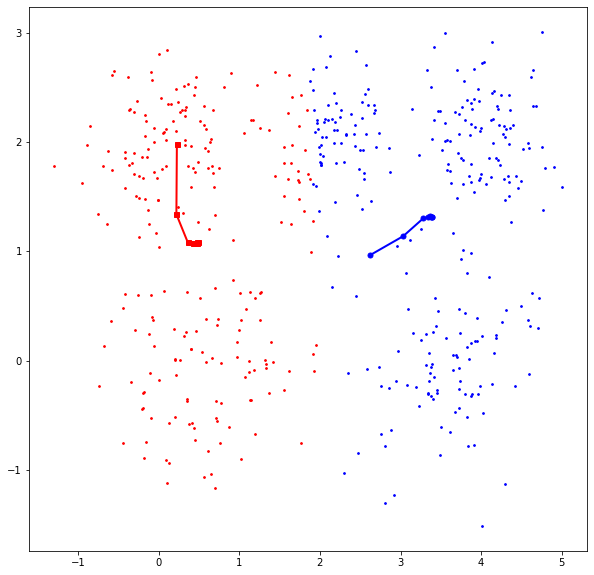

In [94]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
x = sio.loadmat('kmeans_data.mat')['X']
k = 2  # modify if you want

min_SD = np.Infinity
max_SD = -1
max_idx = []
max_ctrs = []
max_iter_ctrs = []
min_idx = []
min_ctrs = []
min_iter_ctrs = []

# test 1000 times
for i in range(1000):
    idx, ctrs, iter_ctrs = kmeans(x, k)
    curSD = 0
    for j in range(k):
        thisClusterIndex = np.where(idx == j)
        tmp = x[thisClusterIndex] - ctrs[j]
        # sum of distances per cluster
        curSD += np.sum(np.sum(np.square(tmp), axis=1)) 
    if(curSD > max_SD):
        max_SD = curSD
        max_idx = idx
        max_ctrs = ctrs
        max_iter_ctrs = iter_ctrs
    if(curSD < min_SD):
        min_SD = curSD
        min_idx = idx
        min_ctrs = ctrs
        min_iter_ctrs = iter_ctrs

# draw plots of the largest SD and the smallest SD
print("max_SD = {}".format(max_SD))
print("min_SD = {}".format(min_SD))
kmeans_plot(x, max_idx, max_ctrs, max_iter_ctrs)
kmeans_plot(x, min_idx, min_ctrs, min_iter_ctrs)

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

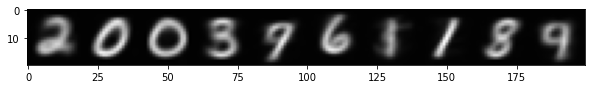

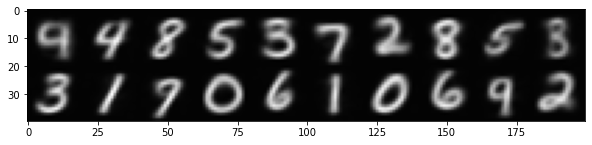

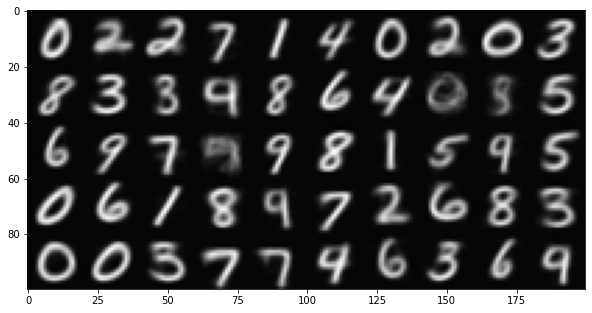

In [46]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

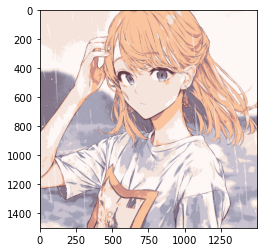

In [61]:
import kmeans
from matplotlib.pyplot import imread

img = imread('mySample.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
# begin answer
N = fea.shape[0]
idx, ctrs, _ = kmeans.kmeans(fea, 8)
fea = []
for i in range(N):
    fea.append(ctrs[idx[i]])
fea = np.array(fea)
# end answer

plt.imshow(fea.reshape(img.shape).astype(np.uint8))
plt.imsave("mySample_k=8.jpg", fea.reshape(img.shape).astype(np.uint8))

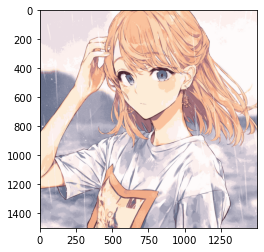

In [62]:
img = imread('mySample.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
# begin answer
N = fea.shape[0]
idx, ctrs, _ = kmeans.kmeans(fea, 16)
fea = []
for i in range(N):
    fea.append(ctrs[idx[i]])
fea = np.array(fea)
# end answer

plt.imshow(fea.reshape(img.shape).astype(np.uint8))
plt.imsave("mySample_k=16.jpg", fea.reshape(img.shape).astype(np.uint8))

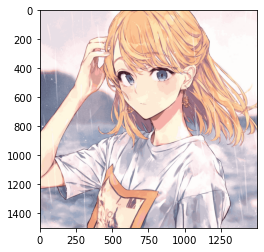

In [63]:
img = imread('mySample.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
# begin answer
N = fea.shape[0]
idx, ctrs, _ = kmeans.kmeans(fea, 32)
fea = []
for i in range(N):
    fea.append(ctrs[idx[i]])
fea = np.array(fea)
# end answer

plt.imshow(fea.reshape(img.shape).astype(np.uint8))
plt.imsave("mySample_k=32.jpg", fea.reshape(img.shape).astype(np.uint8))

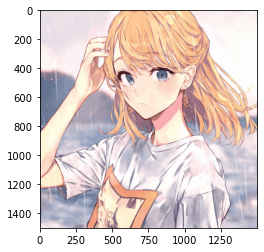

In [2]:
from kmeans import kmeans
from matplotlib.pyplot import imread
import numpy as np
import matplotlib.pyplot as plt

img = imread('mySample.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
# begin answer
N = fea.shape[0]
idx, ctrs, _ = kmeans(fea, 64)
fea = []
for i in range(N):
    fea.append(ctrs[idx[i]])
fea = np.array(fea)
# end answer

plt.imshow(fea.reshape(img.shape).astype(np.uint8))
plt.imsave("mySample_k=64.jpg", fea.reshape(img.shape).astype(np.uint8))

In [9]:
def ratio(K, p):
    r = np.divide(p * np.log2(K) + 24 * K, 24 * p)
    print("{:.4f}".format(r))

pix = 1500 * 1500
k = [8, 16, 32, 64]

# print compression ratios
for i in k:
    ratio(i, pix)

0.1250
0.1667
0.2083
0.2500
